In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('data/타이타닉/test.csv')
df['pred'] = ''
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'pred'],
      dtype='object')

In [39]:
cols = ['Name', 'Sex', 'Age', 'Fare', 'Pclass', 'Embarked', '예측결과']
df = df[cols]
df.columns = ['성명', '성별', '나이', '요금', '등석', '항구', '예측결과']
df.head()

KeyError: "['예측결과'] not in index"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

test = pd.read_csv('data/타이타닉/테스트.csv')
train = pd.read_csv('data/타이타닉/훈련.csv')

X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

model.fit(X, y)

X_pred = test.iloc[:, :].values
y_pred = model.predict(X_pred)

df_test = pd.read_csv('data/타이타닉/test.csv')
df_test['pred'] = y_pred

df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
test.head(1)

,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,3,1,2.0,0.0,2,2,1


In [ ]:
train.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,0,3,1,1.0,0.0,0,2,2


In [ ]:
train = pd.read_csv('data/타이타닉/훈련.csv')
train['Age'].value_counts()

Age
1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: count, dtype: int64

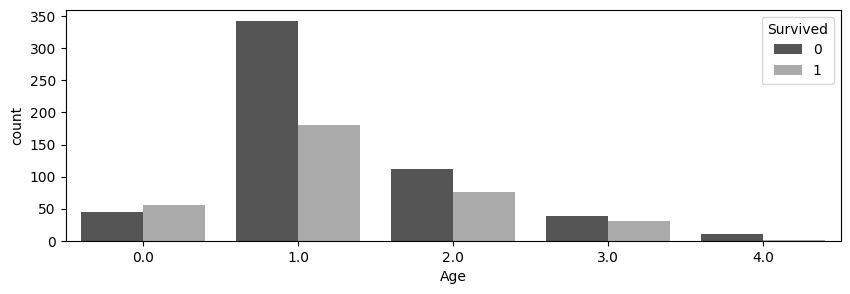

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.countplot(x='Age',hue='Survived', data=train, palette='gray')
plt.show()

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,0,3,1,1.0,0.0,0,2,2
1,1,1,0,2.0,0.0,1,3,2
2,1,3,0,1.0,0.0,0,1,1
3,1,1,0,2.0,0.0,0,3,2
4,0,3,1,2.0,0.0,0,2,1


In [ ]:
group = train.groupby('Age').size()
group

Age
0.0    100
1.0    523
2.0    188
3.0     69
4.0     11
dtype: int64

In [ ]:
group = train['Age'].value_counts()
group

Age
1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: count, dtype: int64

In [ ]:
df_total = group.to_frame('전체')
df_total

,전체
Age,
1.0,523
2.0,188
0.0,100
3.0,69
4.0,11


In [ ]:
group = train[train['Survived']==1]['Age'].value_counts()
df_survived = group.to_frame('생존')
df_survived

,생존
Age,
1.0,180
2.0,76
0.0,55
3.0,30
4.0,1


In [ ]:
join = df_total.join(df_survived)
join

,전체,생존
Age,,
1.0,523,180
2.0,188,76
0.0,100,55
3.0,69,30
4.0,11,1


In [ ]:
join['사망'] = join['전체'] - join['생존']
join

,전체,생존,사망
Age,,,
1.0,523,180,343
2.0,188,76,112
0.0,100,55,45
3.0,69,30,39
4.0,11,1,10


In [ ]:
join['생존율'] = join['생존']/join['전체']
join

,전체,생존,사망,생존율
Age,,,,
1.0,523,180,343,0.344168
2.0,188,76,112,0.404255
0.0,100,55,45,0.550000
3.0,69,30,39,0.434783
4.0,11,1,10,0.090909


In [ ]:
def rate(col):
    group = train['Age'].value_counts()
    df_total = group.to_frame('전체')
    group = train[train['Survived']==1][col].value_counts()
    df_survived = group.to_frame('생존')
    join = df_total.join(df_survived)
    join['사망'] = join['전체'] - join['생존']
    join['생존율'] = join['생존']/join['전체']
    return join

In [41]:
df = rate('Age')
df

,전체,생존,사망,생존율
Age,,,,
1.0,523,180,343,0.344168
2.0,188,76,112,0.404255
0.0,100,55,45,0.550000
3.0,69,30,39,0.434783
4.0,11,1,10,0.090909


In [42]:
df_train = pd.read_csv('data/타이타닉/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df_train['AgeRange'] = pd.cut(df_train['Age'], 5)
range = df_train['AgeRange'].value_counts()
range = pd.Series(range)
ranges = range.sort_index().index
index = []
for range in ranges:
    range = str(range).replace('(','').replace(']','').split(',')
    range = f'{float(range[0]):.0f}~{float(range[1]):.0f}'
    index.append(range)
index

['0~16', '16~32', '32~48', '48~64', '64~80']

In [54]:
df = rate('Age')
df = df.sort_index()
df.index = index
df

,전체,생존,사망,생존율
0~16,100,55,45,0.550000
16~32,523,180,343,0.344168
32~48,188,76,112,0.404255
48~64,69,30,39,0.434783
64~80,11,1,10,0.090909


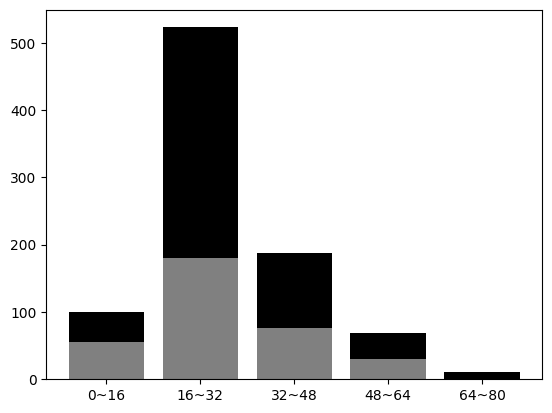

In [57]:

plt.bar(df.index, df['생존'], color='gray')
plt.bar(df.index, df['사망'], bottom=df['생존'], color='black')
plt.show()